# Extraction de connaissances à partir de données structurées et non structurées

## Séance 3 : Analyse en Composantes Principales (ACP)

### Utilisation de `python`

## Librairies utilisées

Module [`sklearn`](https://scikit-learn.org/) (nommé *scikit-learn*) très utilisé dans le Machine Learning sous `python`

- Fonction `PCA` du module `decomposition` : réalise les calculs de l'ACP
- Fonction `scale` du module `preprocessing` : permet de normaliser les variables (moy = 0, var = 1)

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Données utilisées

Données sur des iris [disponibles ici](https://fxjollois.github.io/donnees/Iris.txt)

In [2]:
iris = pandas.read_table("https://fxjollois.github.io/donnees/Iris.txt", sep = "\t")
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Suppression de la variable `Species`

ACP uniquement sur des variables quantitatives

In [3]:
iris2 = iris.drop("Species", axis = 1)
iris2.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Réalisation de l'ACP

Ici, `scale()` permet donc de normaliser chaque variable

In [4]:
pca = PCA(n_components = 4)
pca.fit(scale(iris2))

PCA(n_components=4)

In [5]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [6]:
pca.singular_values_

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [7]:
pca.mean_

array([-4.73695157e-16, -7.81597009e-16, -4.26325641e-16, -4.73695157e-16])

## Calcul des valeurs propres

In [8]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[2.93808505 0.9201649  0.14774182 0.02085386]
[0.72962445 0.22850762 0.03668922 0.00517871]


In [9]:
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(len(pca.explained_variance_))], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,2.938085,73.0,73.0
1,Dim2,0.920165,23.0,96.0
2,Dim3,0.147742,4.0,99.0
3,Dim4,0.020854,1.0,100.0


## Choix du nombre de facteurs

### Premier graphique : diagramme des variances expliquées


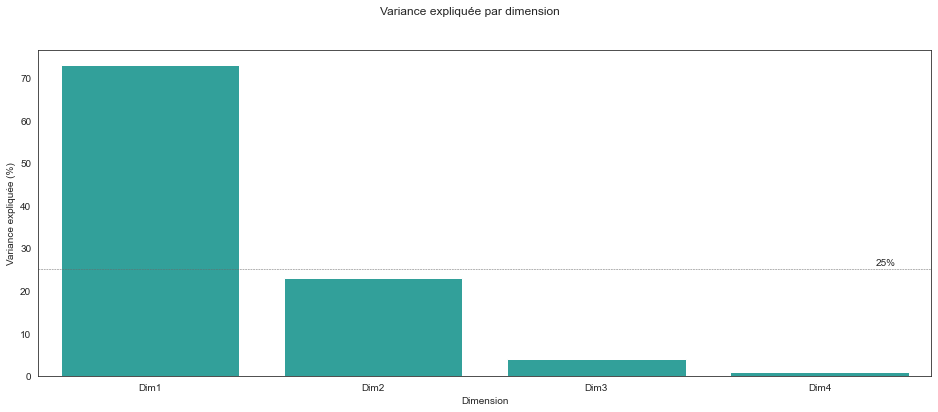

In [10]:
plt.figure(figsize=(16, 6))

g_eig = seaborn.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        color = "lightseagreen",
                        data = eig)

# ligne indicatrice du seuil de sélection des dimensions
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")

g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

## Choix du nombre de facteurs

### Deuxième graphique : évolution de la variance expliquée et variance expliqu&e cumulée


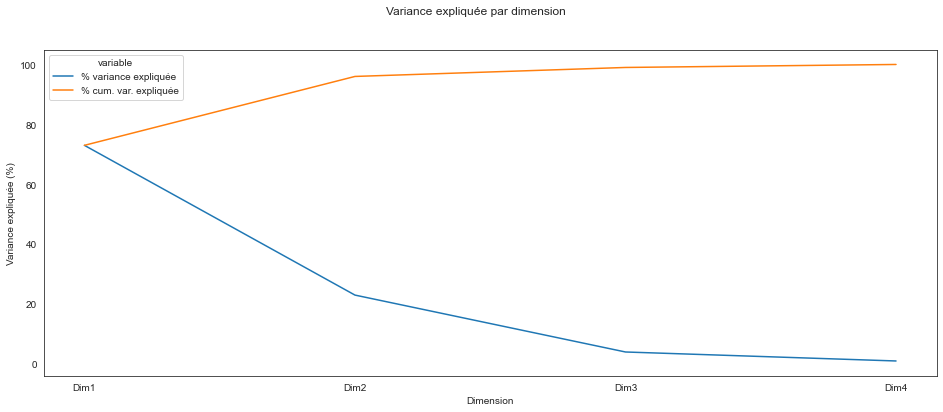

In [11]:
plt.figure(figsize=(16, 6))

eig2 = eig.filter(["Dimension", "% variance expliquée", "% cum. var. expliquée"]).melt(id_vars = "Dimension")
g_eig2 = seaborn.lineplot(x = "Dimension", 
                 y = "value",
                 hue = "variable",
                 data = eig2)

g_eig2.set(ylabel = "Variance expliquée (%)")
g_eig2.figure.suptitle("Variance expliquée par dimension")

plt.show()

## Visualisation du nuage de points

Récupération des dimensions avec les espèces pour la représentation

In [12]:
iris_pca = pca.transform(scale(iris[iris.columns[:4]]))
iris_pca_df = pandas.DataFrame({
    "Dim1" : iris_pca[:,0], 
    "Dim2" : iris_pca[:,1], 
    "Species" : iris.Species
})
iris_pca_df.head()

,Dim1,Dim2,Species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


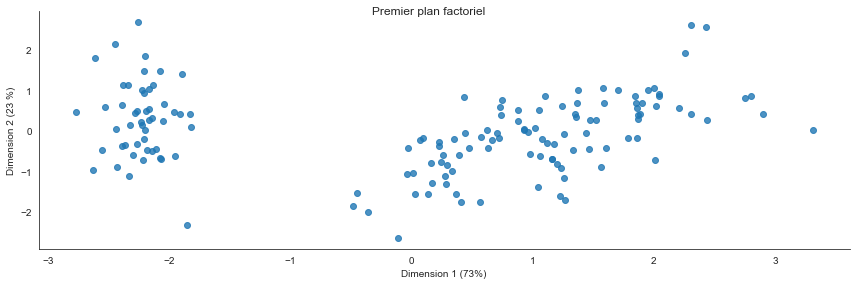

In [13]:
g_pca = seaborn.lmplot(x = "Dim1", y = "Dim2", data = iris_pca_df, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()

## Représentation des variables

Obligation de faire un calcul pour avoir les coordonnées des variables

In [14]:
pandas.DataFrame(pca.components_.T, columns=['PC'+str(i) for i in range(1, 5)], index=iris.columns[:4])

,PC1,PC2,PC3,PC4
Sepal Length,0.521066,0.377418,-0.719566,-0.261286
Sepal Width,-0.269347,0.923296,0.244382,0.123510
Petal Length,0.580413,0.024492,0.142126,0.801449
Petal Width,0.564857,0.066942,0.634273,-0.523597


In [15]:
coordvar = pca.components_.T * numpy.sqrt(pca.explained_variance_)
coordvar_df = pandas.DataFrame(coordvar, columns=['PC'+str(i) for i in range(1, 5)], index=iris.columns[:4])
coordvar_df

,PC1,PC2,PC3,PC4
Sepal Length,0.893151,0.362039,-0.276581,-0.037732
Sepal Width,-0.461684,0.885673,0.093934,0.017836
Petal Length,0.994877,0.023494,0.054629,0.115736
Petal Width,0.968212,0.064214,0.243797,-0.075612


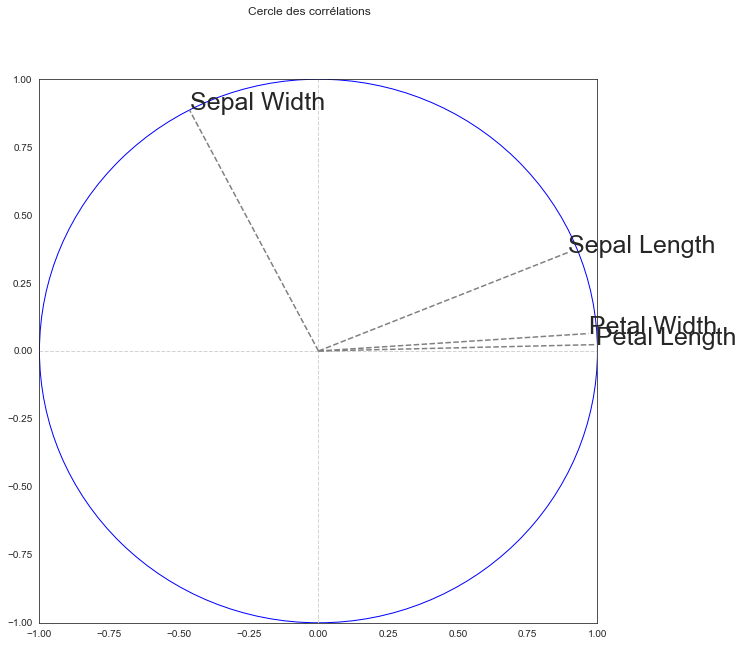

In [16]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(coordvar_df.shape[0]):
    axes.text(coordvar_df["PC1"].iloc[j],
              coordvar_df["PC2"].iloc[j], 
              coordvar_df.index[j], 
              size = 25)
    axes.plot([0,coordvar_df["PC1"].iloc[j]], 
              [0,coordvar_df["PC2"].iloc[j]], 
              color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

## Représentation simultanée

Analyse conjointe des deux nuages (individus et variables)

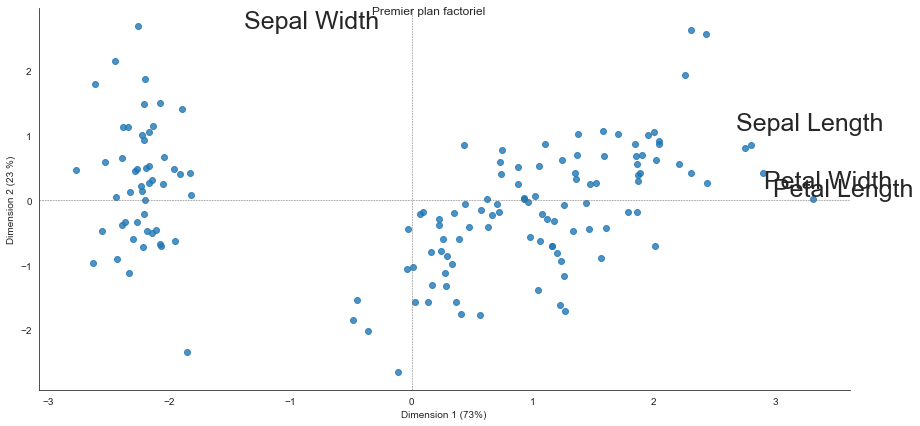

In [17]:
g_pca = seaborn.lmplot(x = "Dim1", y = "Dim2", 
                       data = iris_pca_df, fit_reg = False, 
                       height = 6, aspect = 2)

g_pca.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")
g_pca.fig.suptitle("Premier plan factoriel")

axes = g_pca.axes[0,0]
for j in range(coordvar_df.shape[0]):
    axes.text(3 * coordvar_df["PC1"].iloc[j],
              3 * coordvar_df["PC2"].iloc[j], 
              coordvar_df.index[j], size = 25)
plt.axvline(x = iris_pca_df.Dim1.mean(), linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = iris_pca_df.Dim2.mean(), linewidth = .5, color = "dimgray", linestyle = "--")

plt.show()

## Visualisation des espèces sur le premier plan factoriel

Gros intérêt de l'ACP : représenter une variable qualitative sur le plan factoriel

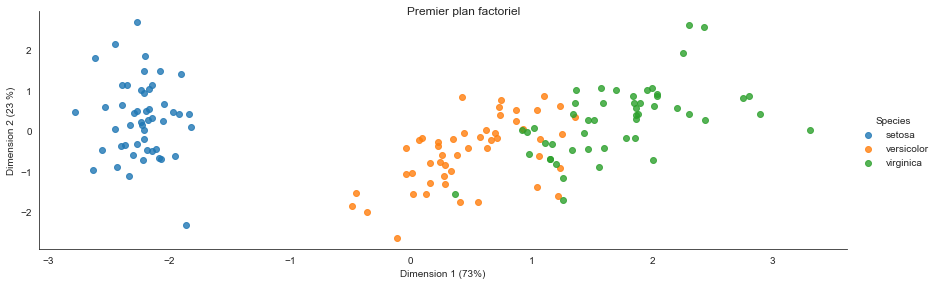

In [18]:
g_pca = seaborn.lmplot(x = "Dim1", y = "Dim2", hue = "Species", data = iris_pca_df, fit_reg = False, 
                       height = 4, aspect = 3)

g_pca.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()

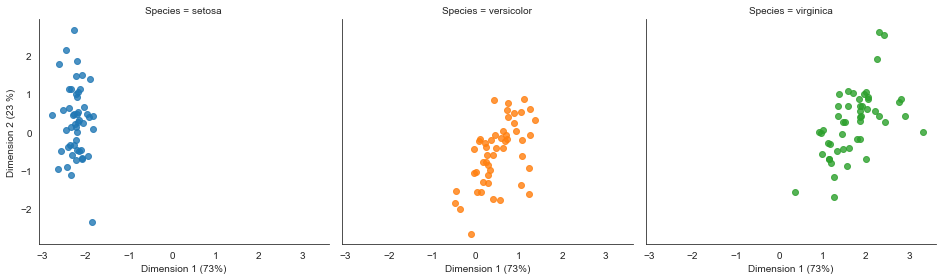

In [19]:
g_pca2 = seaborn.lmplot(x = "Dim1", y = "Dim2", hue = "Species", col = "Species", 
                        data = iris_pca_df, fit_reg = False,
                        height = 4, aspect = 1.1)
g_pca2.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()

## Exercice - Wine

Nous allons travailler sur des données concernant 3 types de vin. Elles sont disponibles sur [cette page](https://archive.ics.uci.edu/ml/datasets/wine) de l'UCI MLR. Il s'agit de 178 vins, réparties en 3 classes donc, et décrit par 13 variables quantitatives (lire la description dans le fichier `wine.names` pour plus d'informations).

Le code suivant permet de charger les données, et de nommer correctement les variables.

In [20]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pandas.read_csv(url, header = None, sep = ",")
wine.columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
                "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", 
                "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
wine

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Travail à faire

Vous devez donc réaliser les étapes suivantes :

- Décrire les données
- Réaliser une ACP centrée ou normée (choix à justifier)
- Produire les graphiques nécessaires à l’interprétation
- Identifier les classes sur le plan factoriel
- Que peut-on dire globalement ?


## Worldwide Governance Indicators

La banque mondiale fournit un grand nombre de données, dont des indicateurs de gouvernance au niveau mondial (voir [ici](https://data.worldbank.org/data-catalog/worldwide-governance-indicators)). Le code ci-dessous importe les données 2019 présentes dans le fichier [WGI_Data.csv](https://fxjollois.github.io/donnees/WGI/wgi2019.csv) (que vous pouvez donc télécharger). Les informations concernant la définition des indicateurs sont les suivantes :

- **`CC` : Control of Corruption**
    - Control of Corruption captures perceptions of the extent to which public power is exercised for private gain, including both petty and grand forms of corruption, as well as capture" of the state by elites and private interests. Estimate gives the country's score on the aggregate indicator
- **`GE` : Government Effectiveness**
    - Government Effectiveness captures perceptions of the quality of public services, the quality of the civil service and the degree of its independence from political pressures, the quality of policy formulation and implementation, and the credibility of the government's commitment to such policies. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.
- **`PV` :Political Stability and Absence of Violence/Terrorism**
    - Political Stability and Absence of Violence/Terrorism measures perceptions of the likelihood of political instability and/or politically-motivated violence, including terrorism. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.
- **`RQ` : Regulatory Quality**
    - Regulatory Quality captures perceptions of the ability of the government to formulate and implement sound policies and regulations that permit and promote private sector development. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.
- **`RL` : Rule of Law**
    - Rule of Law captures perceptions of the extent to which agents have confidence in and abide by the rules of society, and in particular the quality of contract enforcement, property rights, the police, and the courts, as well as the likelihood of crime and violence. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.
- **`VA` : Voice and Accountability**
    - Voice and Accountability captures perceptions of the extent to which a country's citizens are able to participate in selecting their government, as well as freedom of expression, freedom of association, and a free media. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.


In [21]:
wgi = pandas.read_csv("https://fxjollois.github.io/donnees/WGI/wgi2019.csv")
wgi

,Country,Code,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,Aruba,ABW,1.294189,1.357372,1.029933,0.857360,1.263128,1.217238
1,Andorra,ADO,1.139154,1.615139,1.908749,1.228176,1.579939,1.234392
2,Afghanistan,AFG,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527,-1.401076
3,Angola,AGO,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343,-1.054683
4,Anguilla,AIA,NaN,1.367357,0.815824,0.846231,0.355737,1.234392
...,...,...,...,...,...,...,...,...
209,Serbia,SRB,0.026626,-0.091665,0.019079,0.113867,-0.119070,-0.445551
210,South Africa,ZAF,0.670388,-0.217931,0.367380,0.156172,-0.076408,0.084924
211,"Congo, Dem. Rep.",ZAR,-1.365966,-1.808007,-1.627429,-1.509667,-1.786088,-1.538931
212,Zambia,ZMB,-0.286199,-0.102216,-0.675215,-0.554269,-0.462069,-0.640345


### Travail à faire

Vous devez donc réaliser les étapes suivantes :

- Décrire rapidement les données
- Réaliser une ACP centrée ou normée (choix à justifier), sur les données
- Produire les graphiques nécessaires à l’interprétation
- Identifier les pays les plus représentatifs de chaque axe (en se basant sur leurs coordonnées par exempe)
- Que peut-on dire globalement ?